<img align="right" width="200" height="200" src="https://static.wikia.nocookie.net/lego/images/2/23/PPG_logo.png">

# <span style="color:#EF7C8E">Feature Scaling & Feature Engineering</span>
### <span style="color:#726060"> Sara Aldubaie</span>
<hr style="border:2px solid gray"> </hr>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

# Cost Functions
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

# 
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score

# Scalers
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

# Feature Engineering
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

# Plot style
plt.style.use("seaborn-whitegrid")

In [2]:
# Load Data
df = sns.load_dataset("titanic")

df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [3]:
# duplicate columns or more than 80% values are nulls 
df = df.drop(['adult_male', 'embarked', 'alive', 'alone', 'deck' ], axis = 1)
# fill null using Forward filling 


ffill_col = ['age', 'embark_town']
df.update(df[ffill_col].fillna(method="ffill"))



# Split Data
train, test = train_test_split(
    df, 
    train_size = .80,
    test_size =.20,
    random_state=42
)

train, val = train_test_split(
    train,
    train_size = .80,
    test_size = .20,
    random_state=42
)

In [4]:
train.head(30)

,survived,pclass,sex,age,sibsp,parch,fare,class,who,embark_town
517,0,3,male,34.00,0,0,24.1500,Third,man,Queenstown
792,0,3,female,16.00,8,2,69.5500,Third,woman,Southampton
472,1,2,female,33.00,1,2,27.7500,Second,woman,Southampton
483,1,3,female,63.00,0,0,9.5875,Third,woman,Southampton
9,1,2,female,14.00,1,0,30.0708,Second,child,Cherbourg
769,0,3,male,32.00,0,0,8.3625,Third,man,Southampton
743,0,3,male,24.00,1,0,16.1000,Third,man,Southampton
634,0,3,female,9.00,3,2,27.9000,Third,child,Southampton
562,0,2,male,28.00,0,0,13.5000,Second,man,Southampton
869,1,3,male,4.00,1,1,11.1333,Third,child,Southampton


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 569 entries, 517 to 131
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     569 non-null    int64   
 1   pclass       569 non-null    int64   
 2   sex          569 non-null    object  
 3   age          569 non-null    float64 
 4   sibsp        569 non-null    int64   
 5   parch        569 non-null    int64   
 6   fare         569 non-null    float64 
 7   class        569 non-null    category
 8   who          569 non-null    object  
 9   embark_town  569 non-null    object  
dtypes: category(1), float64(2), int64(4), object(3)
memory usage: 45.1+ KB


In [6]:
# Model with only numeric features
train.dtypes

survived          int64
pclass            int64
sex              object
age             float64
sibsp             int64
parch             int64
fare            float64
class          category
who              object
embark_town      object
dtype: object

In [7]:
(df.dtypes != "category").values & (df.dtypes != "object").values 

array([ True,  True, False,  True,  True,  True,  True, False, False,
       False])

In [8]:
def cleaner(df):
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values & (df.dtypes != "object").values 

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df

train_numeric = cleaner(train)
val_numeric = cleaner(val)

In [9]:
# Create X, y train and validation sets

target = "survived"

X_train = train_numeric.drop(target, axis=1)
y_train = train_numeric[target]

X_val = val_numeric.drop(target, axis=1)
y_val = val_numeric[target]

In [10]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr.score(X_val, y_val)

0.6643356643356644

In [11]:
lr.coef_

array([[-0.80545841, -0.02345904, -0.21009216,  0.21810948,  0.00494747]])

In [12]:
lr.intercept_

array([1.87289773])

In [13]:
pd.concat([X_train, y_train], axis = 1)

,pclass,age,sibsp,parch,fare,survived
517,3,34.0,0,0,24.1500,0
792,3,16.0,8,2,69.5500,0
472,2,33.0,1,2,27.7500,1
483,3,63.0,0,0,9.5875,1
9,2,14.0,1,0,30.0708,1
...,...,...,...,...,...,...
79,3,30.0,0,0,12.4750,1
164,3,1.0,4,1,39.6875,0
117,2,29.0,1,0,21.0000,0
8,3,27.0,0,2,11.1333,1


In [14]:
def classification_score(y_true, y_predict):
    
    
    "Calculate classification Score Functions and print output"
    
    result_dict = {}
    
    recall =recall_score(y_true, y_predict)
    precision  =precision_score(y_true, y_predict)
    accuracy =accuracy_score(y_true, y_predict)
    
    ls = [recall, precision, accuracy]
    ls2 = ["Recall", "Precision", "Accuracy"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict

# Save results to object and print results
print("Baseline")
b_preds = [y_train.mode() for x in range(len(y_train))]
res0 = classification_score(y_train, b_preds)
print("\nLogistic Regression")
res1 = classification_score(y_train, lr.predict(X_train))

Baseline
Recall: 0.0
Precision: 0.0
Accuracy: 0.6274165202108963

Logistic Regression
Recall: 0.419811320754717
Precision: 0.6691729323308271
Accuracy: 0.7065026362038664


C:\Users\SarOonh\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [15]:
# Instantiate Scaler Object
scaler = StandardScaler()

# Apply to X data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)

# Look at the transformed data
X_train_scaled[:5]

array([[ 0.7933513 ,  0.36420292, -0.48356406, -0.47705818, -0.1682761 ],
       [ 0.7933513 , -0.88560988,  5.93388081,  1.97946764,  0.71422213],
       [-0.41688165,  0.29476887,  0.31861655,  1.97946764, -0.09829827],
       [ 0.7933513 ,  2.37779021, -0.48356406, -0.47705818, -0.45134615],
       [-0.41688165, -1.02447797,  0.31861655, -0.47705818, -0.05318589]])

In [16]:
# Train the model 
lr2 = LogisticRegression()
lr2.fit(X_train_scaled, y_train)
lr2.score(X_val_scaled, y_val)

0.6713286713286714

In [17]:
res2 = classification_score(y_val, lr2.predict(X_val_scaled))

Recall: 0.42857142857142855
Precision: 0.6153846153846154
Accuracy: 0.6713286713286714


In [18]:
lr2.coef_

array([[-0.67190643, -0.33554799, -0.25901055,  0.17962306,  0.24507638]])

In [19]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02
mean,-3.523836e-16,7.863267e-17,-1.303390e-16,2.421418e-16,6.185250e-17
std,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00,1.000880e+00
min,-1.627115e+00,-1.967392e+00,-4.835641e-01,-4.770582e-01,-6.377107e-01
25%,-4.168816e-01,-6.773078e-01,-4.835641e-01,-4.770582e-01,-4.836623e-01
50%,7.933513e-01,-5.240135e-02,-4.835641e-01,-4.770582e-01,-3.566661e-01
75%,7.933513e-01,5.030710e-01,3.186166e-01,-4.770582e-01,-4.484298e-02
max,7.933513e-01,3.558169e+00,5.933881e+00,6.892519e+00,9.321091e+00


In [20]:
# Instantiate Scaler Object
scaler2 = RobustScaler()

# Apply to X data
X_train_robust = scaler2.fit_transform(X_train)
X_val_robust = scaler2.transform(X_val)

# Look at the transformed data
X_train_robust[:5]

array([[ 0.        ,  0.35294118,  0.        ,  0.        ,  0.42931118],
       [ 0.        , -0.70588235,  8.        ,  2.        ,  2.44038538],
       [-1.        ,  0.29411765,  1.        ,  2.        ,  0.58877962],
       [ 0.        ,  2.05882353,  0.        ,  0.        , -0.2157608 ],
       [-1.        , -0.82352941,  1.        ,  0.        ,  0.69158361]])

In [21]:
# Train the model
lr3 = LogisticRegression()
lr3.fit(X_train_robust, y_train)
lr3.score(X_val_robust, y_val)

0.6713286713286714

In [22]:
res3 = classification_score(y_val, lr3.predict(X_val_robust))

Recall: 0.42857142857142855
Precision: 0.6153846153846154
Accuracy: 0.6713286713286714


In [23]:
lr2.coef_

array([[-0.67190643, -0.33554799, -0.25901055,  0.17962306,  0.24507638]])

In [24]:
# Instantiate Scaler Object
scaler3 = MinMaxScaler()

# Apply to X data
X_train_mm = scaler3.fit_transform(X_train)
X_val_mm = scaler3.transform(X_val)

# Look at the transformed data
X_train_mm[:5]

array([[1.        , 0.42196532, 0.        , 0.        , 0.04713766],
       [1.        , 0.19577783, 1.        , 0.33333333, 0.13575256],
       [0.5       , 0.40939935, 0.125     , 0.33333333, 0.05416439],
       [1.        , 0.78637849, 0.        , 0.        , 0.01871355],
       [0.5       , 0.17064589, 0.125     , 0.        , 0.05869429]])

In [25]:
# Train the model
lr4 = LogisticRegression()
lr4.fit(X_train_mm, y_train)
lr4.score(X_val_mm, y_val)

0.6713286713286714

In [26]:
res4 = classification_score(y_val, lr4.predict(X_val_mm))

Recall: 0.4107142857142857
Precision: 0.6216216216216216
Accuracy: 0.6713286713286714


In [27]:
lr4.coef_

array([[-1.65246186, -1.36266754, -0.81684239,  0.87030963,  1.0187786 ]])

In [28]:
train.describe(exclude="number")

,sex,class,who,embark_town
count,569,569,569,569
unique,2,3,3,3
top,male,Third,man,Southampton
freq,376,326,347,420


In [29]:
# Extract Date Times

# Create our One Hot Encoder object
one_hot = OneHotEncoder()

col_names = ["class","who" ,"embark_town"]

# One Hot encode the column
one_hot_df = one_hot.fit_transform(train[col_names]).toarray()
one_hot_df_val = one_hot.transform(val[col_names]).toarray()

In [30]:
# Look at the categories
one_hot.categories_

[array(['First', 'Second', 'Third'], dtype=object),
 array(['child', 'man', 'woman'], dtype=object),
 array(['Cherbourg', 'Queenstown', 'Southampton'], dtype=object)]

In [31]:
# Create column names list for one hot encoded features
column_names = []

for y in range(len(one_hot.categories_)):
    for z in range(len(one_hot.categories_[y])):
        #print(one_hot.categories_[y][z])
        column_names.append(col_names[y]+"_"+one_hot.categories_[y][z])


column_names

['class_First',
 'class_Second',
 'class_Third',
 'who_child',
 'who_man',
 'who_woman',
 'embark_town_Cherbourg',
 'embark_town_Queenstown',
 'embark_town_Southampton']

In [32]:
def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["class","who" ,"embark_town"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

column_names = col_names(one_hot)

In [33]:
# Values for each row
one_hot_df

array([[0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 1., 0., ..., 0., 0., 1.],
       ...,
       [0., 1., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 1.]])

In [34]:
# Cast One Hot Encoded values into a dataframe

oh_df = pd.DataFrame(
    one_hot_df,
    index=train.index,
    columns = column_names
)

oh_df_val = pd.DataFrame(
    one_hot_df_val,
    index=val.index,
    columns = column_names
)

print(oh_df.shape)
print(oh_df_val.shape)

(569, 9)
(143, 9)


In [35]:
oh_df.head()

,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
517,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
792,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
472,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
483,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [36]:
# Create train_new df by mergind train and one hot encoded df together and drop color and clarity cols
train_new = train.merge(oh_df, on=train.index).set_index("key_0").drop(["class","who" ,"embark_town"], axis=1)
val_new = val.merge(oh_df_val, on=val.index).set_index("key_0").drop(["class","who" ,"embark_town"], axis=1)

print(train_new.shape)
print(val_new.shape)

(569, 16)
(143, 16)


In [37]:
train_new.head()

,survived,pclass,sex,age,sibsp,parch,fare,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
key_0,,,,,,,,,,,,,,,,
517,0,3,male,34.0,0,0,24.1500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
792,0,3,female,16.0,8,2,69.5500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
472,1,2,female,33.0,1,2,27.7500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
483,1,3,female,63.0,0,0,9.5875,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9,1,2,female,14.0,1,0,30.0708,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [38]:
ordinal = OrdinalEncoder()

col_names = ["sex"]

# Ordinal encode the column
ordinal_ls = ordinal.fit_transform(train[col_names])
ordinal_ls_val = ordinal.transform(val[col_names])

In [39]:
# Look at categories
ordinal.categories_

[array(['female', 'male'], dtype=object)]

In [40]:
# Add oridnally encoded column to the data
train_new["sex"] = ordinal_ls
val_new["sex"] = ordinal_ls_val

train_new.sample(5)

,survived,pclass,sex,age,sibsp,parch,fare,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
key_0,,,,,,,,,,,,,,,,
495,0,3,1.0,21.0,0,0,14.4583,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0
161,1,2,0.0,40.0,0,0,15.7500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
178,0,2,1.0,30.0,0,0,13.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
404,0,3,0.0,20.0,0,0,8.6625,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
467,0,1,1.0,56.0,0,0,26.5500,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [41]:
target = "survived"

X_train = train_new.drop(target, axis=1)
y_train = train_new[target]

X_val = val_new.drop(target, axis=1)
y_val = val_new[target]

In [42]:
lr5 = LogisticRegression()

lr5.fit(X_train, y_train)
lr5.score(X_val, y_val)

C:\Users\SarOonh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8251748251748252

In [43]:
res4 = classification_score(y_val, lr5.predict(X_val))

Recall: 0.7678571428571429
Precision: 0.7818181818181819
Accuracy: 0.8251748251748252


In [44]:
X_train

,pclass,sex,age,sibsp,parch,fare,class_First,class_Second,class_Third,who_child,who_man,who_woman,embark_town_Cherbourg,embark_town_Queenstown,embark_town_Southampton
key_0,,,,,,,,,,,,,,,
517,3,1.0,34.0,0,0,24.1500,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
792,3,0.0,16.0,8,2,69.5500,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
472,2,0.0,33.0,1,2,27.7500,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
483,3,0.0,63.0,0,0,9.5875,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
9,2,0.0,14.0,1,0,30.0708,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,3,0.0,30.0,0,0,12.4750,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
164,3,1.0,1.0,4,1,39.6875,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
117,2,1.0,29.0,1,0,21.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0


In [45]:
# Verify that index values match in both datasets
# We expect to see the same number of rows in X_train as the sum value
X_train.shape[0] == sum(X_train.index == y_train.index)

True

In [46]:
# Model
lr6 = LogisticRegression()

lr6.fit(X_train, y_train)
lr6.score(X_val, y_val)

C:\Users\SarOonh\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.8251748251748252

In [47]:
res5 = classification_score(y_val, lr6.predict(X_val))

Recall: 0.7678571428571429
Precision: 0.7818181818181819
Accuracy: 0.8251748251748252


In [48]:
# remember in classification you calc the % of increase
# and in regression you calc the % of decrease 
# this is because of the nature of the cost functions for each type


delta_Recall = ((res5['Recall']- res1['Recall'])/res5['Recall'])*100
delta_Precision = ((res5['Precision']- res1['Precision'])/res5['Precision'])*100
delta_Accuracy = ((res5['Accuracy']- res1['Accuracy'])/res5['Accuracy'])*100

delta_ls = [round(delta_Recall), round(delta_Precision), round(delta_Accuracy)]
delta_ls2 = ["Recall %", "Precision %", "Accuracy %"]
    
for x in range(len(delta_ls)):
    print(f"{delta_ls2[x]}: {delta_ls[x]}")
        

Recall %: 45
Precision %: 14
Accuracy %: 14


In [49]:
# Used for saving out models
import joblib
import seaborn as sns
import datetime

In [50]:
# Getting a time stamp for today

str(datetime.datetime.today())

'2021-06-22 15:17:19.531271'

In [51]:
# Getting only the date from the time stamp

str(datetime.datetime.today())[:10]

'2021-06-22'

In [52]:
# Save the model as todays date

# Note: these will be saved in a file called models
# Note: if the file does not exist --> create it
# Todays date as string
today = str(datetime.datetime.today())[:10].replace("-", "_")

joblib.dump(scaler, f"./models/scaler_{today}")
joblib.dump(one_hot, f"./models/one_hot_{today}")
joblib.dump(ordinal, f"./models/ordinal_{today}")
joblib.dump(lr6, f"./models/model_{today}")

['./models/model_2021_06_22']

In [53]:
# Load the model
jl_scaler = joblib.load(f"./models/scaler_{today}")
jl_one_hot = joblib.load(f"./models/one_hot_{today}")
jl_ordinal = joblib.load(f"./models/ordinal_{today}")
jl_model = joblib.load(f"./models/model_{today}")

In [54]:
# Column names for one hot and ordinal encoder
col_names_one_hot = ["embarked", "class","who" , "deck", "embark_town", "alive"]
col_names_ordinal = ["sex"]

# Change column order to make addition of scaled features easier
#col_order_ls = ['carat','depth', 'table', 'x', 'y', 'z', 'cut', 'color_D', 'color_E',
#       'color_F', 'color_G', 'color_H', 'color_I', 'color_J', 'clarity_I1',
#       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
#       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2']

def cleaner(df):
    "Return Only Numeric Features"
    
    # Create boolean array with only columns that are float64
    columns_bool = (df.dtypes != "category").values

    # Return only numeric columns
    df = df.iloc[:, columns_bool].dropna()

    return df


def col_names(one_hot_model):
    
    "Create columns names list for one hot encoded feature"
    
    column_names = []
    
    col_names = ["embarked", "class","who" , "deck", "embark_town", "alive"]

    for y in range(len(one_hot_model.categories_)):
        for z in range(len(one_hot_model.categories_[y])):
            # print(one_hot.categories_[y][z])
            column_names.append(col_names[y]+"_"+one_hot_model.categories_[y][z])
            
    return column_names

def classification_score(y_true, y_predict):
    
    "Calculate classification Score Functions and print output"
    
    result_dict = {}
    
    recall =recall_score(y_true, y_predict)
    precision  =precision_score(y_true, y_predict)
    accuracy =accuracy_score(y_true, y_predict)
    
    ls = [recall, precision, accuracy]
    ls2 = ["Recall", "Precision", "Accuracy"]
    
    for x in range(len(ls)):
        print(f"{ls2[x]}: {ls[x]}")
        result_dict[ls2[x]] = ls[x]
    
    return result_dict



In [55]:
# Compare with actual model
# Should have this model in memory, if not then run the code for the model above
lr6.score(X_val, y_val)

0.8251748251748252

In [56]:
jl_model.score(X_val, y_val)

0.8251748251748252

In [57]:
# Check to see exact predictions are being made for reproducibiblity
sum(jl_model.predict(X_val) == lr6.predict(X_val))

143

In [58]:
X_val.shape

(143, 15)

In [59]:
print("Loaded Model")
loaded_preds = jl_model.predict(X_val)
res6 = classification_score(y_val, loaded_preds)
print("\nLinear Regression 6")
classification_score(y_val, lr6.predict(X_val));

Loaded Model
Recall: 0.7678571428571429
Precision: 0.7818181818181819
Accuracy: 0.8251748251748252

Linear Regression 6
Recall: 0.7678571428571429
Precision: 0.7818181818181819
Accuracy: 0.8251748251748252


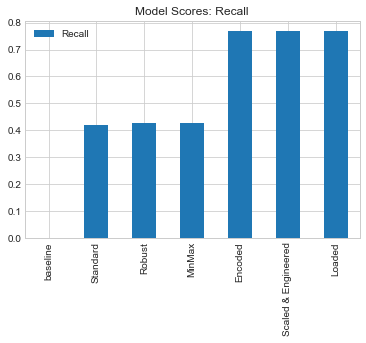

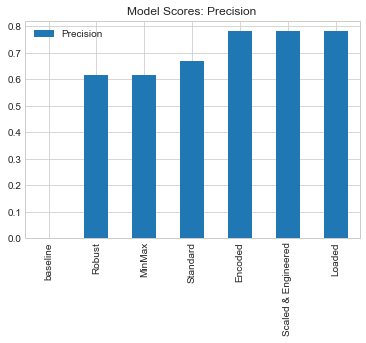

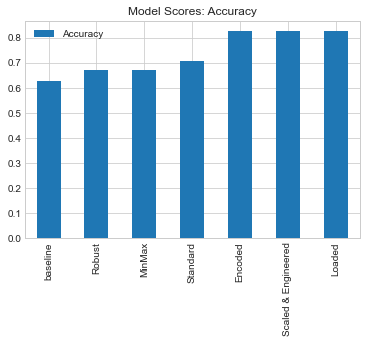

In [60]:
model_ls = ["baseline", "Standard", "Robust", "MinMax", "Encoded", "Scaled & Engineered", "Loaded"]
result_ls = [res0, res1, res2, res3, res4, res5, res6]

res_df = pd.DataFrame(result_ls, index=model_ls)

for x in ["Recall", "Precision", "Accuracy"]:
    res_df.loc[:,res_df.columns == x].sort_values(by=x).plot(kind="bar", title=f"Model Scores: {x}")